In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture 
from collections import defaultdict
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score,mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
from itertools import product
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Load Visualization packages
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.stats import kurtosis,entropy

import time
import seaborn as sns

In [2]:
from tqdm import tqdm
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss, classification_report
from sklearn.model_selection import train_test_split

In [4]:
import os
save_folder = "../figures/clustering/"
os.path.isdir(save_folder)

True

## Prepare the dataset : Heart Disease

In [5]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

In [6]:
# creating a copy of df
df1_copy = df

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
x = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]
# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
x[continuous_features] = scaler.fit_transform(x[continuous_features])
x = x.values
y = y.squeeze()

## Spams dataset

In [7]:
filename = '../datasets/spambase.csv'
df = pd.read_csv(filename)

In [8]:
data = df.drop(['1'],axis=1)
y_data = df['1']

In [9]:
data = StandardScaler().fit_transform(data)


## Digists 

In [10]:
# from sklearn import datasets
# digits = datasets.load_digits()
# # flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))
# y_data = digits.target

## Experiments 

## KMean

In [218]:
# kmeans = KMeans(random_state=42)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = True)
#     visualizer.fit(x)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"heart_elbow_{}.png".format(i))
# #     plt.close()

In [221]:
silhouette_score?

In [219]:
# kmeans = KMeans(random_state=42)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(kmeans, k=(2,50), metric = i, timings = True)
#     visualizer.fit(data)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"Mnist_elbow_{}.png".format(i))
# #     plt.close()

In [78]:

clusters = np.arange(1,16)

sse_kmm = np.zeros((len(clusters),1))
bic_gmm = np.zeros((len(clusters),1))


for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c,random_state=42).fit(x)
    gmm = GaussianMixture(n_components=c,random_state=42).fit(x)
    
    kmm_y = km.predict(x)
    gmm_y = gmm.predict(x)
    sse_kmm[i] = km.score(x)
    bic_gmm[i] = gmm.score(x)

    



15it [00:10,  1.38it/s]


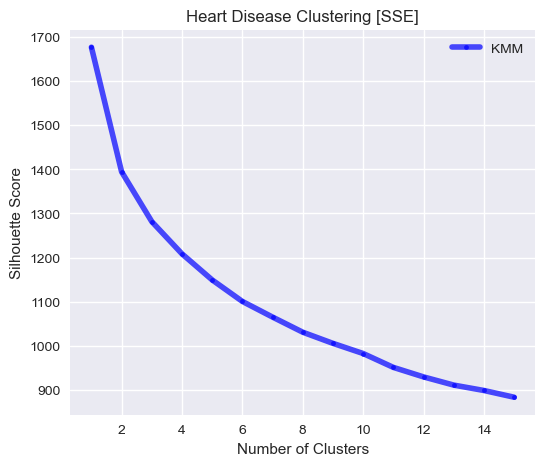

In [79]:
plt.figure(figsize=(6,5))
plt.plot(clusters,-sse_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
# plt.plot(clusters,bic_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Heart Disease Clustering [SSE]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.savefig(save_folder+"heart_elbow.pdf")

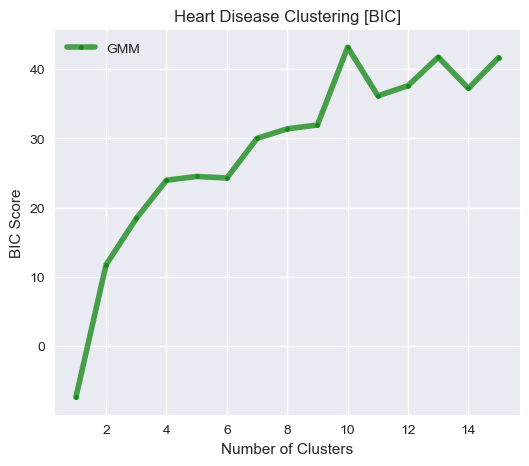

In [80]:
plt.figure(figsize=(6,5))
plt.plot(clusters,bic_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,bic_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Heart Disease Clustering [BIC]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.savefig(save_folder+"heart_BIC.pdf")

In [82]:

clusters = np.arange(2,16)

# sse_kmm = np.zeros((len(clusters),1))
# bic_gmm = np.zeros((len(clusters),1))

homo_kmm = np.zeros((len(clusters),1))
homo_gmm = np.zeros((len(clusters),1))

comp_kmm = np.zeros((len(clusters),1))
comp_gmm = np.zeros((len(clusters),1))

adjust_mut_info_kmm= np.zeros((len(clusters),1))
adjust_mut_info_gmm= np.zeros((len(clusters),1))

silho_kmm = np.zeros((len(clusters),1))
silho_gmm = np.zeros((len(clusters),1))

for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c,random_state=42).fit(x)
    gmm = GaussianMixture(n_components=c,random_state=42).fit(x)
    
    kmm_y = km.predict(x)
    gmm_y = gmm.predict(x)
    
    homo_kmm[i] = homogeneity_score(y,kmm_y)
    homo_gmm[i] = homogeneity_score(y,gmm_y)

    comp_kmm [i] = completeness_score(y,kmm_y)
    comp_gmm [i] = completeness_score(y,gmm_y)


    adjust_mut_info_kmm[i] = ami(y,kmm_y)
    adjust_mut_info_gmm[i] = ami(y,gmm_y)

    silho_kmm[i] = silhouette_score(x,kmm_y)
    silho_gmm[i] = silhouette_score(x,gmm_y)

    



14it [00:10,  1.38it/s]


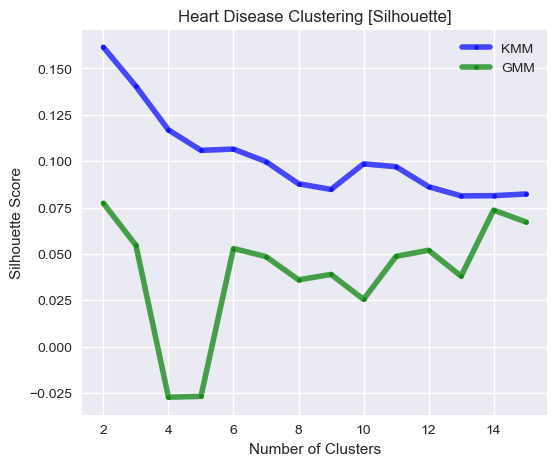

In [83]:
plt.figure(figsize=(6,5))
plt.plot(clusters,silho_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
plt.plot(clusters,silho_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Heart Disease Clustering [Silhouette]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.savefig(save_folder+"heart_silhouette.pdf")

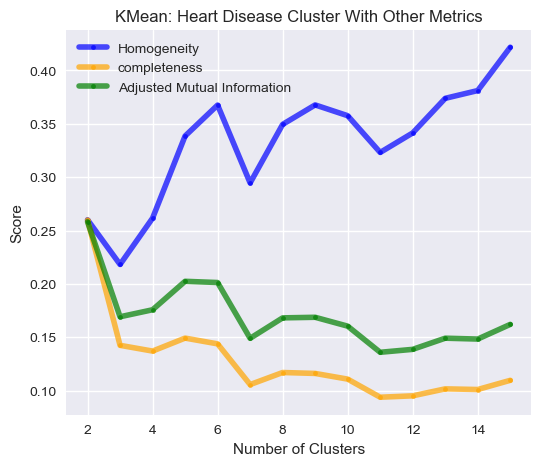

In [84]:
plt.figure(figsize=(6,5))
plt.plot(clusters,homo_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp_kmm,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info_kmm,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Heart Disease Cluster With Other Metrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig(save_folder+"KMM_Heart_other_metrics.pdf")

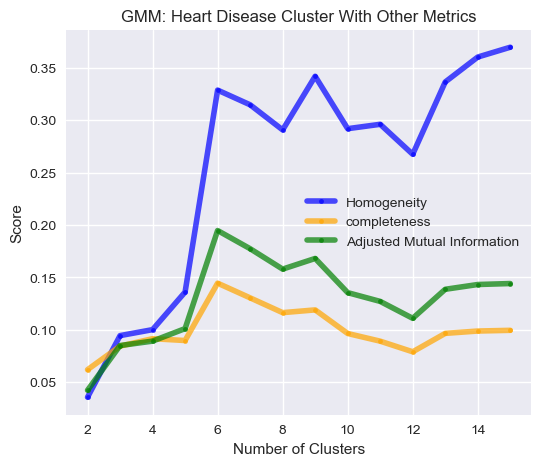

In [85]:
plt.figure(figsize=(6,5))
plt.plot(clusters,homo_gmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp_gmm,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("GMM: Heart Disease Cluster With Other Metrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig(save_folder+"GMM_Heart_other_Metrics.pdf")

In [53]:
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 3], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

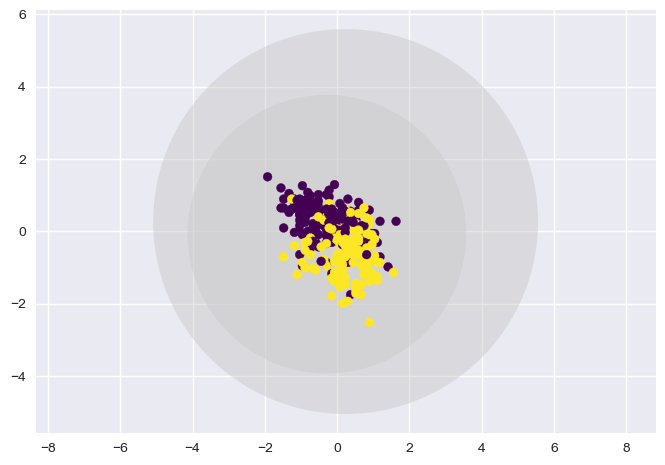

In [54]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, x)

## Spam

In [ ]:

clusters = np.arange(2,16)

spam_sse_kmm = np.zeros((len(clusters),1))
spam_bic_gmm = np.zeros((len(clusters),1))

spam_homo_kmm = np.zeros((len(clusters),1))
spam_homo_gmm = np.zeros((len(clusters),1))

spam_comp_kmm = np.zeros((len(clusters),1))
spam_comp_gmm = np.zeros((len(clusters),1))

spam_adjust_mut_info_kmm= np.zeros((len(clusters),1))
spam_adjust_mut_info_gmm= np.zeros((len(clusters),1))

spam_silho_kmm = np.zeros((len(clusters),1))
spam_silho_gmm = np.zeros((len(clusters),1))

for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c,random_state=42).fit(data)
    gmm = GaussianMixture(n_components=c,random_state=42).fit(data)
    
    kmm_y = km.predict(data)
    gmm_y = gmm.predict(data)
    spam_sse_kmm[i] = km.score(data)
    spam_bic_gmm[i] = gmm.score(data)
    
    spam_homo_kmm[i] = homogeneity_score(y_data,kmm_y)
    spam_homo_gmm[i] = homogeneity_score(y_data,gmm_y)

    spam_comp_kmm [i] = completeness_score(y_data,kmm_y)
    spam_comp_gmm [i] = completeness_score(y_data,gmm_y)
    
    
    spam_adjust_mut_info_kmm[i] = ami(y_data,kmm_y)
    spam_adjust_mut_info_gmm[i] = ami(y_data,gmm_y)

    spam_silho_kmm[i] = silhouette_score(data,kmm_y)
    spam_silho_gmm[i] = silhouette_score(data,gmm_y)
    
    



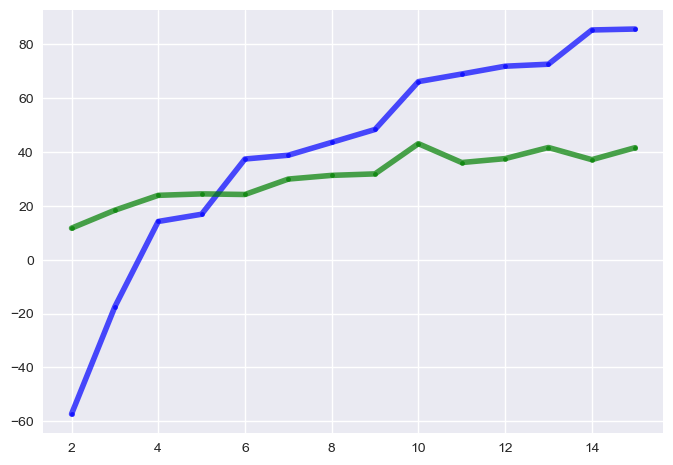

In [258]:
# plt.plot(clusters,spam_bic_gmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
# plt.plot(clusters,bic_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='KMM')


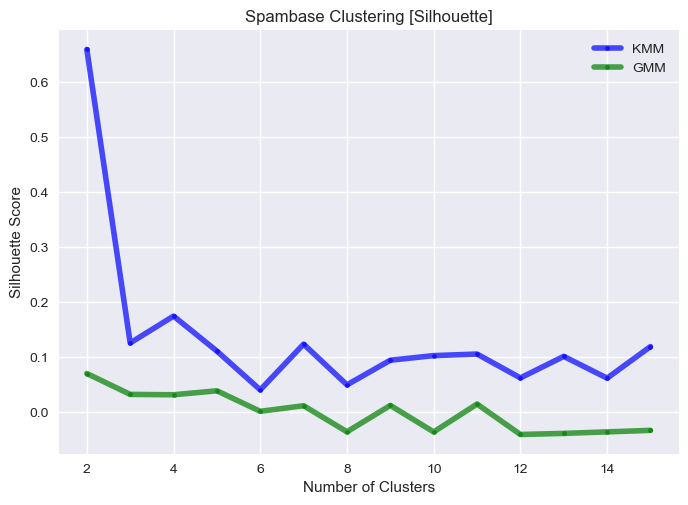

In [255]:
plt.plot(clusters,spam_silho_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
plt.plot(clusters,spam_silho_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Spambase Clustering [Silhouette]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.savefig(save_folder+"spam_silhouette.pdf")

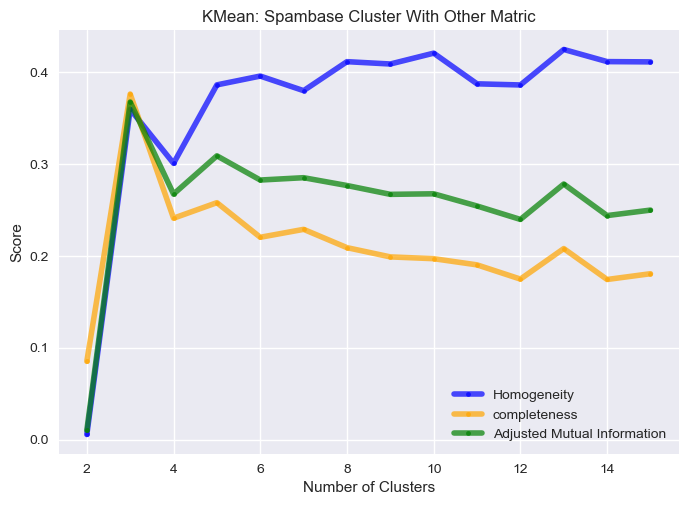

In [259]:
plt.plot(clusters,spam_homo_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,spam_comp_kmm,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,spam_adjust_mut_info_kmm,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Spambase Cluster With Other Matric")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig(save_folder+"KMM_Spam_other_matrice.pdf")

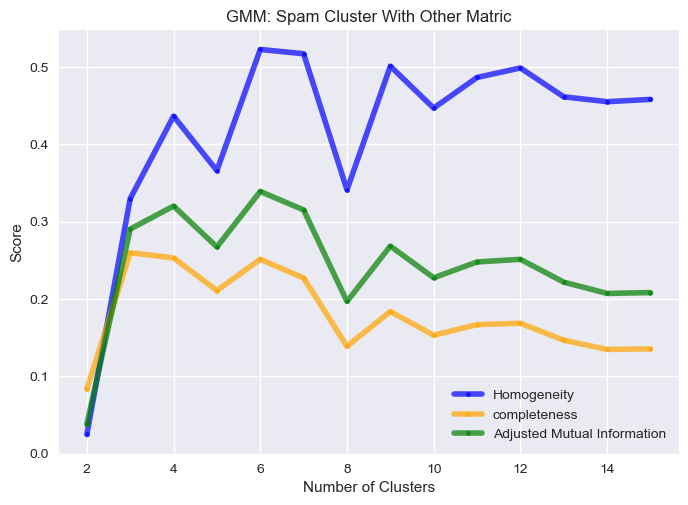

In [260]:
plt.plot(clusters,spam_homo_gmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,spam_comp_gmm,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,spam_adjust_mut_info_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("GMM: Spam Cluster With Other Matric")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig(save_folder+"GMM_Spam_other_matrice.pdf")

In [206]:

# clusters = np.arange(2,data.shape[1])
# homo = np.zeros((len(clusters),1))
# comp = np.zeros((len(clusters),1))
# adjust_mut_info= np.zeros((len(clusters),1))
# for i,c in tqdm(enumerate(clusters)):
#     km = KMeans(n_clusters=c).fit(data)
#     homo[i] = homogeneity_score(y_data,km.predict(data))
#     comp [i] = completeness_score(y_data,km.predict(data))
#     adjust_mut_info[i] = ami(y_data,km.predict(data))
    



55it [00:33,  1.66it/s]


In [261]:
# plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
# plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

# plt.title("KMean: spam Cluster Matrics")
# plt.legend(loc='best')
# plt.xlabel("Number of Clusters")
# plt.ylabel("Score")
# # plt.savefig(save_folder+"RHC_train_time.pdf")

In [11]:
# model = KMeans(n_clusters=2, random_state=42)
# visualizer = InterclusterDistance(model, random_state=42)

# visualizer.fit(x)        # Fit the data to the visualizer
# visualizer.show()
# # plt.title("TSNE - Visualization of K-Means clusters - TMDB", fontsize=15)

## EM

In [208]:
# from sklearn.base import ClusterMixin
# from sklearn.mixture import GaussianMixture

# class GaussianMixtureCluster(GaussianMixture, ClusterMixin):
#     """Subclass of GaussianMixture to make it a ClusterMixin."""

#     def fit(self, X):
#         super().fit(X)
#         self.labels_ = self.predict(X)
#         return self

#     def get_params(self, **kwargs):
#         output = super().get_params(**kwargs)
#         output["n_clusters"] = output.get("n_components", None)
#         return output

#     def set_params(self, **kwargs):
#         kwargs["n_components"] = kwargs.pop("n_clusters", None)
#         return super().set_params(**kwargs)


In [262]:

# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
#     visualizer.fit(x)
#     visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
#     plt.close()

In [263]:

# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=42), k=(2,22), metric = i, timings = True,force_model=True)
#     visualizer.fit(data)
#     visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_digits_elbow_{}.png".format(i))
#     plt.close()

In [264]:

# clusters = np.arange(2,22)
# homo = np.zeros((len(clusters),1))
# comp = np.zeros((len(clusters),1))
# adjust_mut_info= np.zeros((len(clusters),1))
# for i,c in tqdm(enumerate(clusters)):
#     gmm = GaussianMixture(n_components=c).fit(x)
#     homo[i] = homogeneity_score(y,gmm.predict(x))
#     comp [i] = completeness_score(y,gmm.predict(x))
#     adjust_mut_info[i] = ami(y,gmm.predict(x))
    



In [265]:
# plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
# plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

# plt.title("EM: Heart Disease Cluster Matrics")
# plt.legend(loc='best')
# plt.xlabel("Number of Clusters")
# plt.ylabel("Score")
# # plt.savefig(save_folder+"RHC_train_time.pdf")

In [266]:
# clusters = np.arange(2,data.shape[1])
# homo = np.zeros((len(clusters),1))
# comp = np.zeros((len(clusters),1))
# adjust_mut_info= np.zeros((len(clusters),1))
# for i,c in tqdm(enumerate(clusters)):
#     gmm = GaussianMixture(n_components=c).fit(data)
#     homo[i] = homogeneity_score(y_data,gmm.predict(data))
#     comp [i] = completeness_score(y_data,gmm.predict(data))
#     adjust_mut_info[i] = ami(y_data,gmm.predict(data))
    



In [267]:
# plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
# plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

# plt.title("EM: Digits Cluster Matrics")
# plt.legend(loc='best')
# plt.xlabel("Number of Clusters")
# plt.ylabel("Score")
# # plt.savefig(save_folder+"RHC_train_time.pdf")

## Dimensionality reduction 

## PCA

## Dataset: Heart Disease

In [268]:
# start = time.time()
# pca = PCA()
# pca.fit(x)
# print("Elapsed time: ", time.time() - start)

# plt.figure(figsize=(5,5))
# plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
# plt.xlabel("Principal Component", fontsize=30)
# plt.ylabel("Variance", fontsize=30)
# plt.tick_params(labelsize = 20)
# # plt.savefig("graphs_DR/wine_PCA_variance.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0, 0.5, 'SSE')

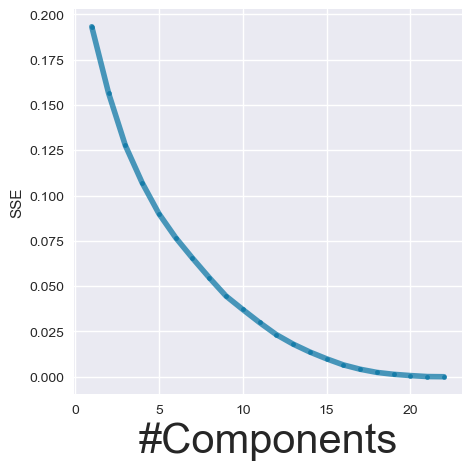

In [73]:
n_components = np.arange(1,23)
results = np.zeros(len(n_components))
for i,n in enumerate(n_components):
    pca = PCA(n_components=n)
    X_transformed = pca.fit(x).transform(x)
    results[i] = mean_squared_error(pca.inverse_transform(X_transformed), x)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components", fontsize=30)
plt.ylabel("SSE")
# plt.savefig("graphs_DR/wine_PCA_SSE.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0.5, 1.0, 'Heart Disease PCA Variance ')

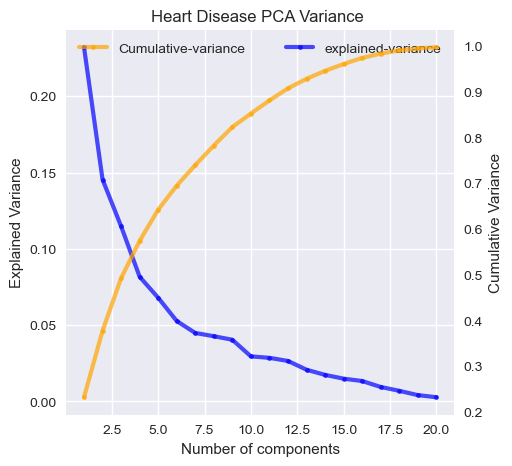

In [68]:
n = 20
pca = PCA(n_components=n).fit(x)

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(range(1,n+1),pca.explained_variance_ratio_,marker='.', linewidth=3, alpha=0.7,color='blue',label='explained-variance')
ax1.legend(loc='best')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Number of components')
ax2 = ax1.twinx()
ax2.plot(range(1,n+1),np.cumsum(pca.explained_variance_ratio_),color = 'orange',label='Cumulative-variance',marker='.', linewidth=3, alpha=0.7)
ax2.set_ylabel('Cumulative Variance')
ax2.legend(loc='best')
plt.grid()
plt.title("Heart Disease PCA Variance ")
# plt.ylabel('Cumulative explained variance')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


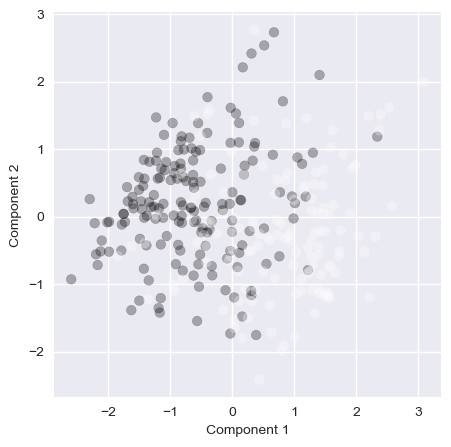

In [28]:
# pca = PCA(n_components = 6).fit(x).transform(x)

# plt.figure(figsize=(5,5))
# plt.scatter(pca[:, 0], pca[:, 1], alpha=0.3, c=y)
# plt.xlabel("Component 1", fontsize=10)
# plt.ylabel("Component 2", fontsize=10)
# # plt.tick_params(labelsize = 20)
# # plt.savefig("graphs_DR/wine_PCA_vis.png", pad_inches = 0.01,  bbox_inches = 'tight')

## Dataset: spam

Text(0.5, 1.0, 'Digits PCA Variance ')

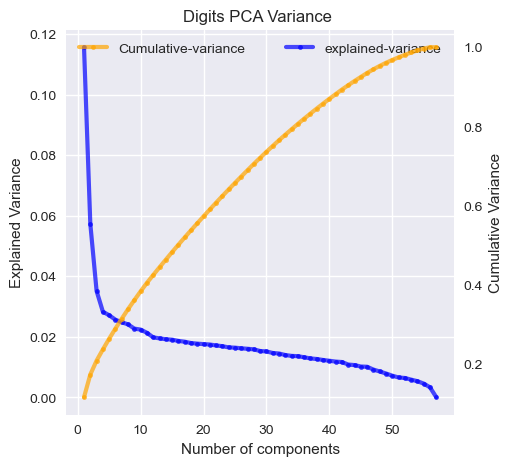

In [269]:
n = data.shape[1]
pca = PCA(n_components=n).fit(data)

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(range(1,n+1),pca.explained_variance_ratio_,marker='.', linewidth=3, alpha=0.7,color='blue',label='explained-variance')
ax1.legend(loc='best')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Number of components')
ax2 = ax1.twinx()
ax2.plot(range(1,n+1),np.cumsum(pca.explained_variance_ratio_),color = 'orange',label='Cumulative-variance',marker='.', linewidth=3, alpha=0.7)
ax2.set_ylabel('Cumulative Variance')
ax2.legend(loc='best')
plt.grid()
plt.title("Digits PCA Variance ")
# plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'SSE')

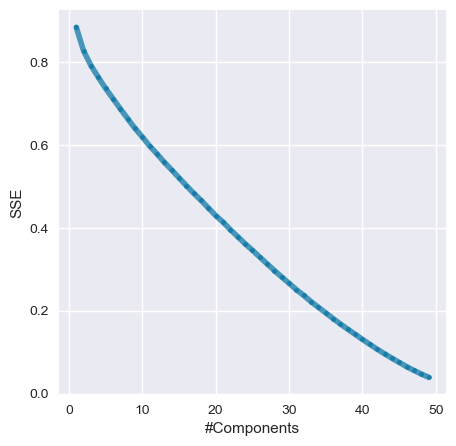

In [270]:
n_components = np.arange(1,50)
results = np.zeros(len(n_components))
for i,n in enumerate(n_components):
    pca = PCA(n_components=n)
    X_transformed = pca.fit(data).transform(data)
    results[i] = mean_squared_error(pca.inverse_transform(X_transformed), data)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components")
plt.ylabel("SSE")
# plt.savefig("graphs_DR/wine_PCA_SSE.png", pad_inches = 0.01,  bbox_inches = 'tight')

## ICA

## Heart dataset

In [271]:
kurt = []
for dim in range(2,x.shape[1]):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(x)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())

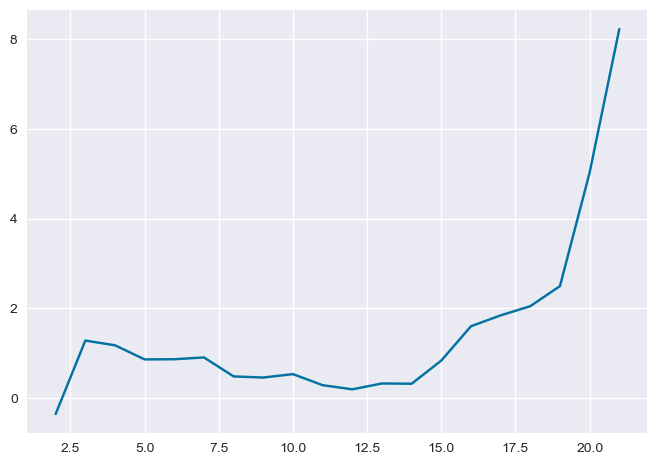

In [272]:
plt.plot(range(2,x.shape[1]),kurt)

Elapsed time:  0.15704607963562012


Text(0, 0.5, 'Kurtosis')

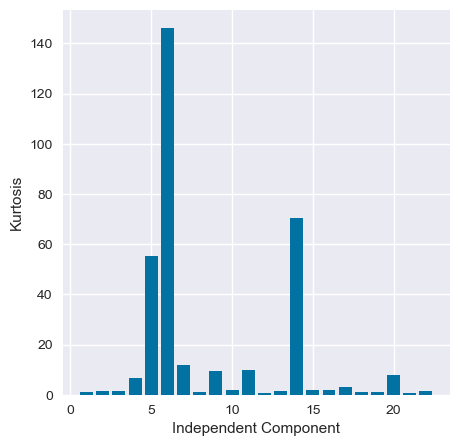

In [274]:
start = time.time()
ica = FastICA()
X_transformed = ica.fit(x).transform(x)
print("Elapsed time: ", time.time() - start)
# order = [-abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]
# X_transformed = X_transformed[:,np.array(order).argsort()]
X_transformed = [abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]


plt.figure(figsize=(5,5))
plt.bar(range(1, len(X_transformed)+1), X_transformed)
plt.xlabel("Independent Component")
plt.ylabel("Kurtosis")
# plt.tick_params(labelsize = 10)
# plt.savefig("graphs_DR/wine_ICA_kurtosis.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0, 0.5, 'SSE')

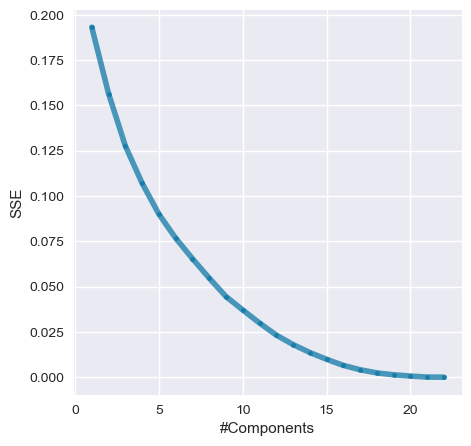

In [12]:
n_components = np.arange(1,23)
results = np.zeros(len(n_components))
for i,n in enumerate(n_components):
    ica = FastICA(n_components=n)
    X_transformed = ica.fit(x).transform(x)
    results[i] = mean_squared_error(ica.inverse_transform(X_transformed), x)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components")
plt.ylabel("SSE")

## Digits

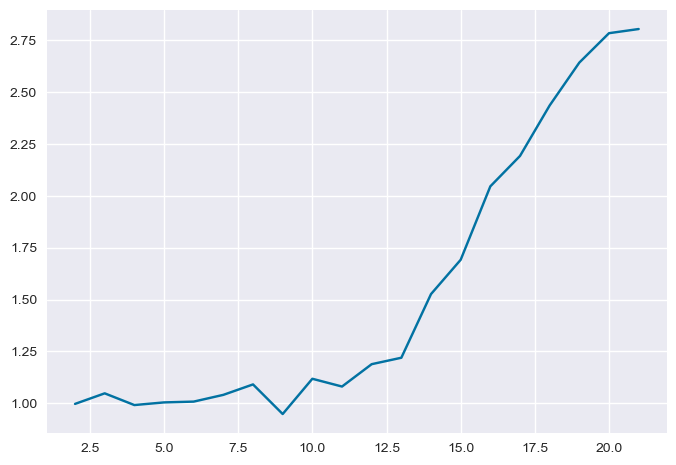

In [11]:
kurt = []
for dim in range(2,x.shape[1]):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(data)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())

plt.plot(range(2,x.shape[1]),kurt)

Elapsed time:  0.33603906631469727


Text(0, 0.5, 'Kurtosis')

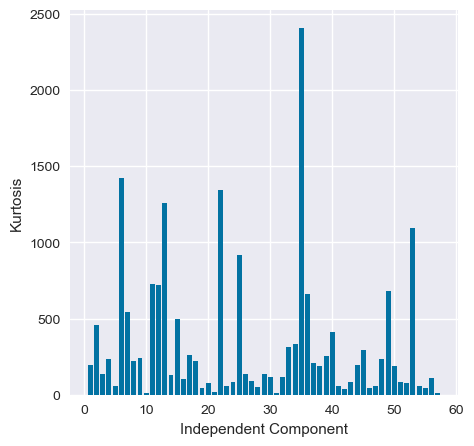

In [279]:
start = time.time()
ica = FastICA()
X_transformed = ica.fit(data).transform(data)
print("Elapsed time: ", time.time() - start)
# order = [-abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]
# X_transformed = X_transformed[:,np.array(order).argsort()]
X_transformed = [abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]


plt.figure(figsize=(5,5))
plt.bar(range(1, len(X_transformed)+1), X_transformed)
plt.xlabel("Independent Component")
plt.ylabel("Kurtosis")
# plt.tick_params(labelsize = 10)
# plt.savefig("graphs_DR/wine_ICA_kurtosis.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0, 0.5, 'SSE')

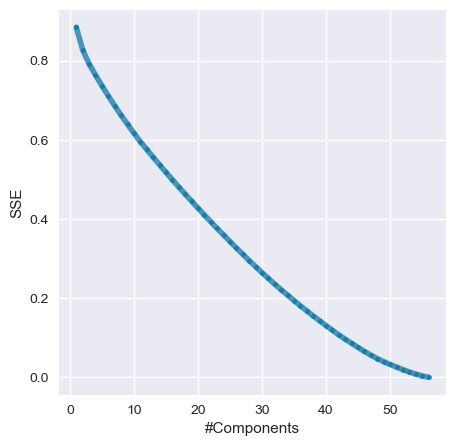

In [280]:
n_components = np.arange(1,data.shape[1])
results = np.zeros(len(n_components))
for i,n in tqdm(enumerate(n_components)):
    ica = FastICA(n_components=n)
    X_transformed = ica.fit(data).transform(data)
    results[i] = mean_squared_error(ica.inverse_transform(X_transformed), data)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components")
plt.ylabel("SSE")

## RP

In [31]:
mse = np.zeros((22,4))
homo = np.zeros((22,4))
n_components = range(1,23)
for i in n_components:
    start = time.time()
    tmp_ = np.zeros(10)
  
    for j in range(10):
        rp = GaussianRandomProjection(n_components=i)
        X_transformed = rp.fit(x).transform(x)
        tmp_[j] = mean_squared_error(np.matmul(X_transformed,rp.components_), x)

    mse[i-1] = [np.min(tmp_), np.mean(tmp_), np.std(tmp_), (time.time() - start)/100]

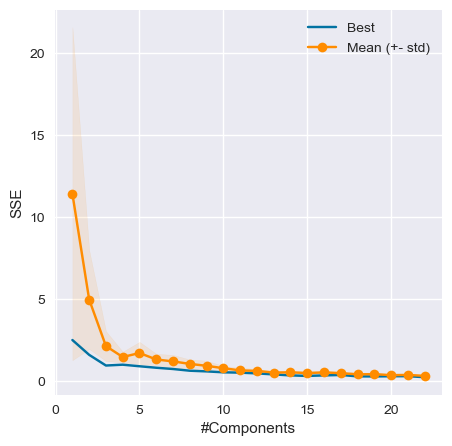

In [32]:
plt.figure(figsize=(5,5))
plt.plot(n_components, mse[:,0], label="Best")
plt.plot(n_components, mse[:,1], 'o-', color="darkorange",
              label="Mean (+- std)")
plt.fill_between(n_components, mse[:,1] - mse[:,2],mse[:,1] + mse[:,2], alpha=0.1,color="darkorange")
plt.xlabel("#Components")
plt.ylabel("SSE")
plt.legend()
plt.tick_params()
# plt.savefig("graphs_DR/wine_rp_SSE_best.png", pad_inches = 0.01,  bbox_inches = 'tight')

In [33]:
from sklearn.metrics.pairwise import pairwise_distances
def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

In [68]:

n_components = np.arange(1,83,4)
corr = np.zeros((len(n_components),4))
for i,n in enumerate(n_components):
    start = time.time()
    tmp_ = np.zeros(10)
  
    for j in range(10):
        rp = SparseRandomProjection(n_components=n)
        tmp_[j] = pairwiseDistCorr(rp.fit_transform(x), x)

    corr[i] = [np.max(tmp_), np.mean(tmp_), np.std(tmp_), (time.time() - start)/100]


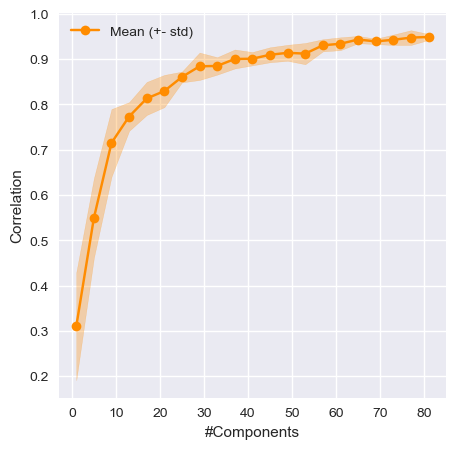

In [69]:
plt.figure(figsize=(5,5))
# plt.plot(n_components, corr[:,0], label="Best")
plt.plot(n_components, corr[:,1], 'o-', color="darkorange",
              label="Mean (+- std)")
plt.fill_between(n_components, corr[:,1] - corr[:,2],corr[:,1] + corr[:,2], alpha=0.3,color="darkorange")
plt.xlabel("#Components")
plt.ylabel("Correlation")
plt.legend()
plt.tick_params()

In [64]:

n_components = np.arange(1,83,4)
corr = np.zeros((len(n_components),4))
for i,n in tqdm(enumerate(n_components)):
    start = time.time()
    tmp_ = np.zeros(10)
  
    for j in range(10):
        rp = SparseRandomProjection(n_components=n)
        tmp_[j] = pairwiseDistCorr(rp.fit_transform(data), data)

    corr[i] = [np.max(tmp_), np.mean(tmp_), np.std(tmp_), (time.time() - start)/100]


21it [00:26,  1.26s/it]


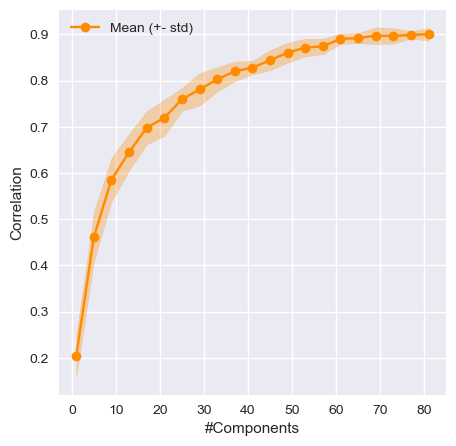

In [67]:
plt.figure(figsize=(5,5))
# plt.plot(n_components, corr[:,0], label="Best")
plt.plot(n_components, corr[:,1], 'o-', color="darkorange",
              label="Mean (+- std)")
plt.fill_between(n_components, corr[:,1] - corr[:,2],corr[:,1] + corr[:,2], alpha=0.3,color="darkorange")
plt.xlabel("#Components")
plt.ylabel("Correlation")
plt.legend()
plt.tick_params()

## Clustering + Reduction

## PCA

In [285]:
pca = PCA(n_components=11)
X_transformed = pca.fit(x).transform(x)

In [286]:

clusters = np.arange(2,16)

sse_kmm = np.zeros((len(clusters),1))
bic_gmm = np.zeros((len(clusters),1))

homo_kmm = np.zeros((len(clusters),1))
homo_gmm = np.zeros((len(clusters),1))

comp_kmm = np.zeros((len(clusters),1))
comp_gmm = np.zeros((len(clusters),1))

adjust_mut_info_kmm= np.zeros((len(clusters),1))
adjust_mut_info_gmm= np.zeros((len(clusters),1))

silho_kmm = np.zeros((len(clusters),1))
silho_gmm = np.zeros((len(clusters),1))

for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c,random_state=42).fit(X_transformed)
    gmm = GaussianMixture(n_components=c,random_state=42).fit(X_transformed)
    
    kmm_y = km.predict(X_transformed)
    gmm_y = gmm.predict(X_transformed)
    sse_kmm[i] = km.score(X_transformed)
    bic_gmm[i] = gmm.score(X_transformed)
    
    homo_kmm[i] = homogeneity_score(y,kmm_y)
    homo_gmm[i] = homogeneity_score(y,gmm_y)

    comp_kmm [i] = completeness_score(y,kmm_y)
    comp_gmm [i] = completeness_score(y,gmm_y)
    
    
    adjust_mut_info_kmm[i] = ami(y,kmm_y)
    adjust_mut_info_gmm[i] = ami(y,gmm_y)

    silho_kmm[i] = silhouette_score(X_transformed,kmm_y)
    silho_gmm[i] = silhouette_score(X_transformed,gmm_y)
    
    



14it [00:03,  4.65it/s]


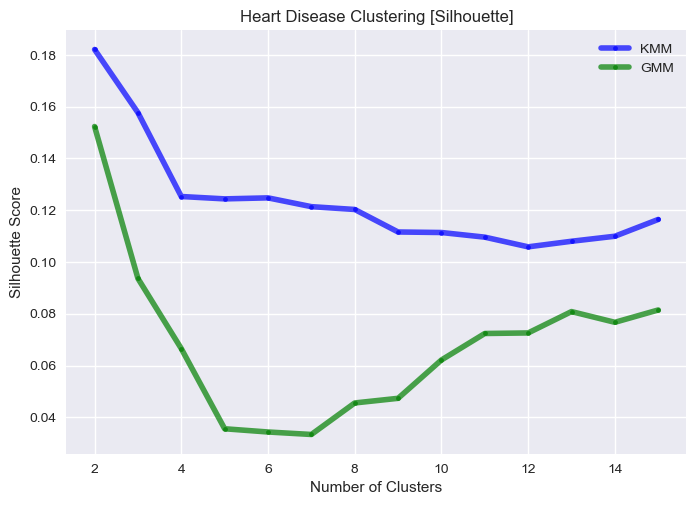

In [288]:
plt.plot(clusters,silho_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
plt.plot(clusters,silho_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Heart Disease Clustering [Silhouette]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.savefig(save_folder+"heart_cluster_RD_silhouette.pdf")

Text(0, 0.5, 'AMI Score')

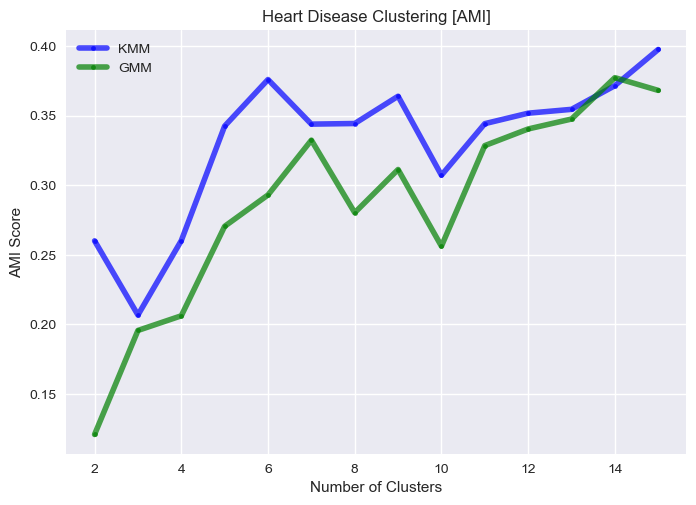

In [290]:
# chose one criterion to plot
plt.plot(clusters,homo_kmm,marker='.', color='blue', linewidth=4, alpha=0.7,label='KMM')
plt.plot(clusters,homo_gmm,marker='.', color='green', linewidth=4, alpha=0.7,label='GMM')
# plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("Heart Disease Clustering [AMI]")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("AMI Score")
# plt.savefig(save_folder+"heart_Clustering_RD_AMI.pdf")

In [281]:
# pca = PCA(n_components=11)
# X_transformed = pca.fit(x).transform(x)
# kmeans = KMeans(random_state=42)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = True)
#     visualizer.fit(X_transformed)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"heart_elbow_{}.png".format(i))
# #     plt.close()

In [282]:
# pca = PCA(n_components=11)
# X_transformed = pca.fit(x).transform(x)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
#     visualizer.fit(X_transformed)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
# #     plt.close()

In [283]:
# pca = PCA(n_components=25)
# X_transformed = pca.fit(data).transform(data)
# kmeans = KMeans(random_state=42)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(kmeans, k=(2,22), metric = i, timings = True)
#     visualizer.fit(X_transformed)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"heart_elbow_{}.png".format(i))
# #     plt.close()

In [284]:
# pca = PCA(n_components=25)
# X_transformed = pca.fit(data).transform(data)
# methods = ['distortion', 'silhouette', 'calinski_harabasz']
# for i in methods:
#     print(i)
#     visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
#     visualizer.fit(X_transformed)
#     visualizer.show() #use to only show
# #     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
# #     plt.close()

## ICA

distortion


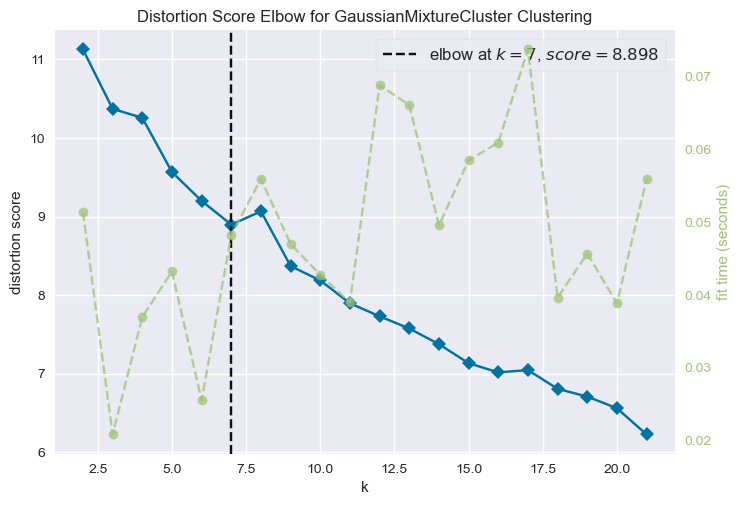

silhouette


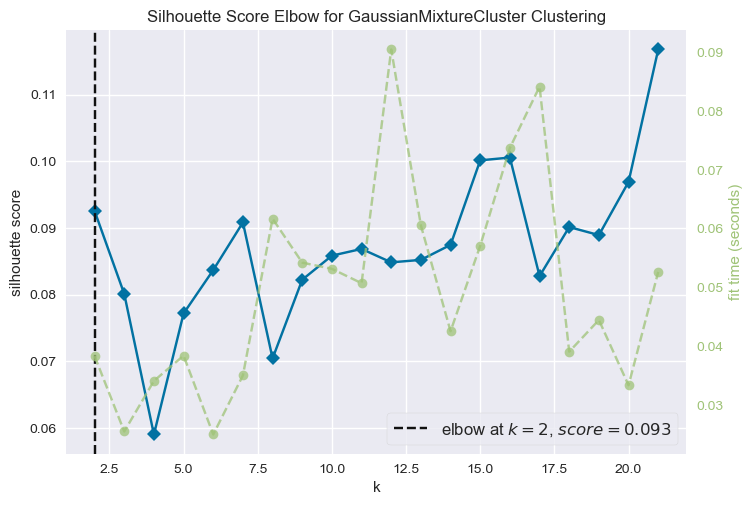

calinski_harabasz


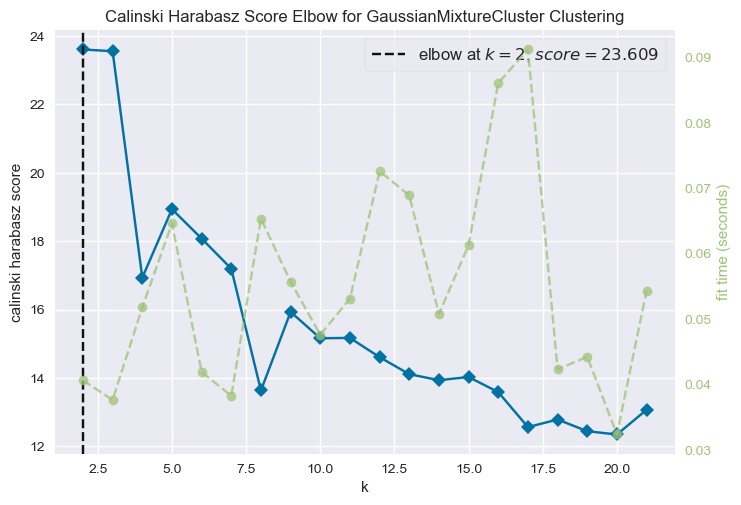

In [79]:
ica = FastICA(n_components=12)
X_transformed = ica.fit(x).transform(x)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(X_transformed)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
#     plt.close()

distortion


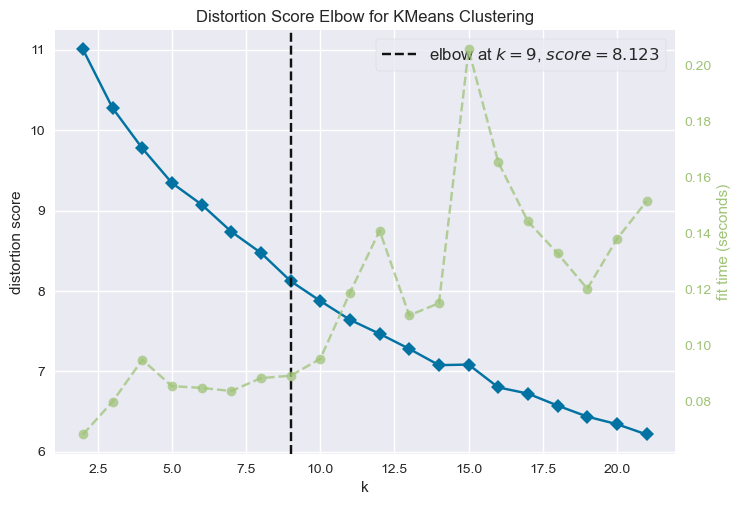

silhouette


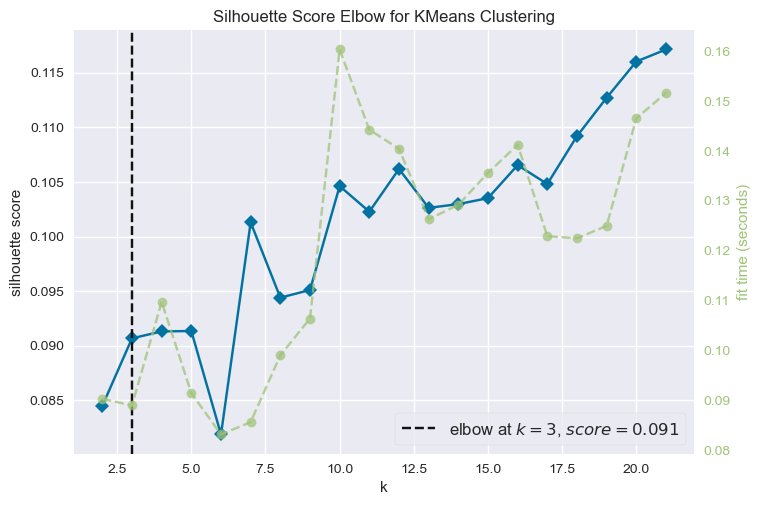

calinski_harabasz


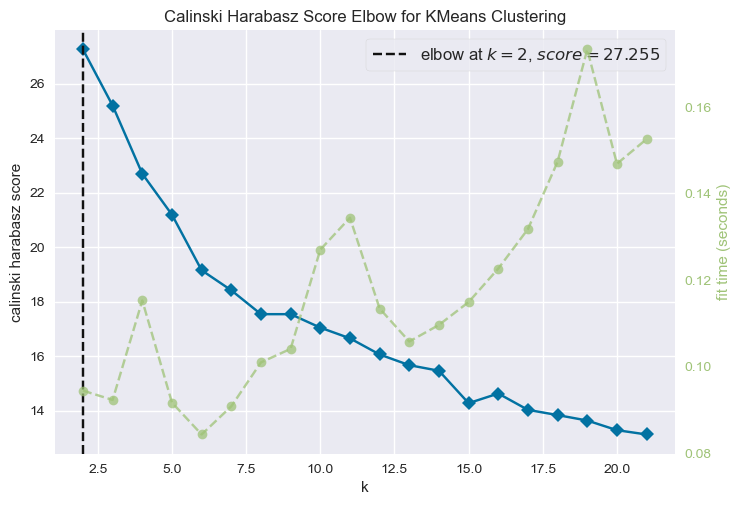

In [81]:
ica = FastICA(n_components=12)
X_transformed = ica.fit(x).transform(x)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(KMeans(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(X_transformed)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
#     plt.close()

distortion


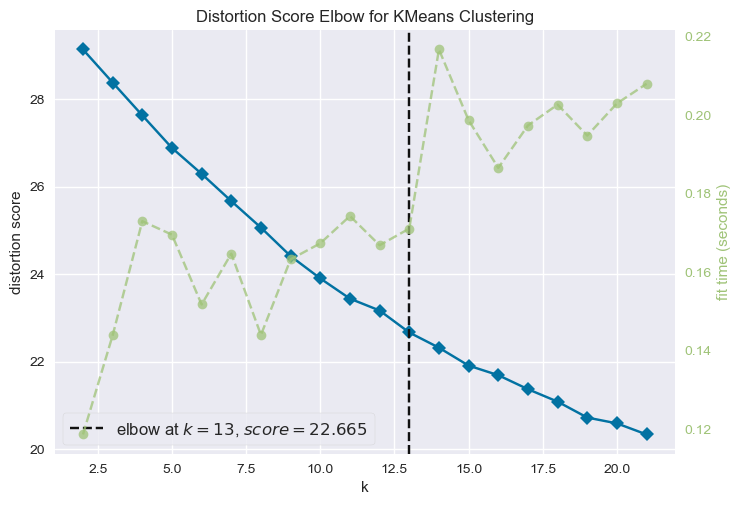

silhouette


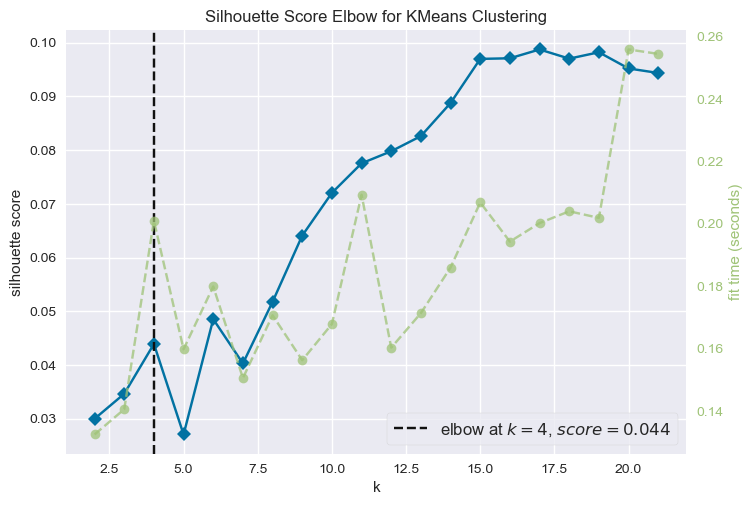

calinski_harabasz


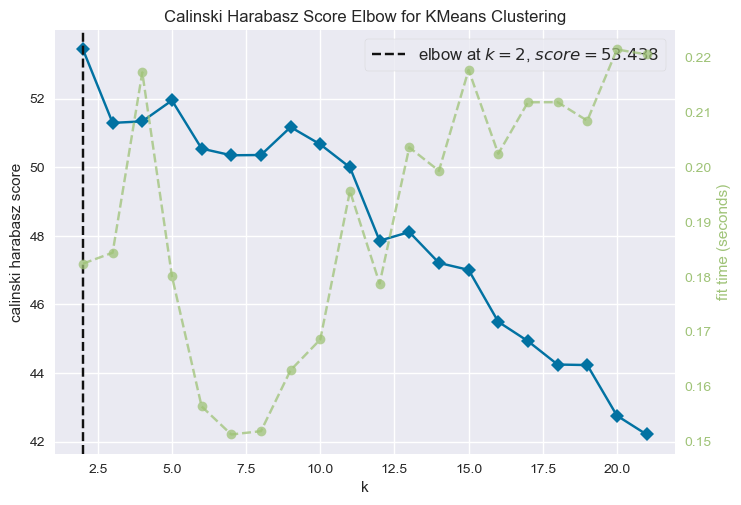

In [85]:
ica = FastICA(n_components=30)
X_transformed = ica.fit(data).transform(data)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(KMeans(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(X_transformed)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
#     plt.close()

distortion


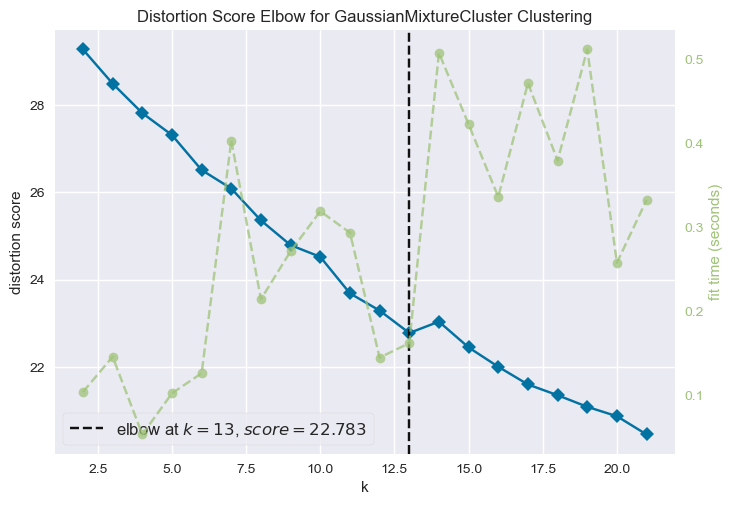

silhouette


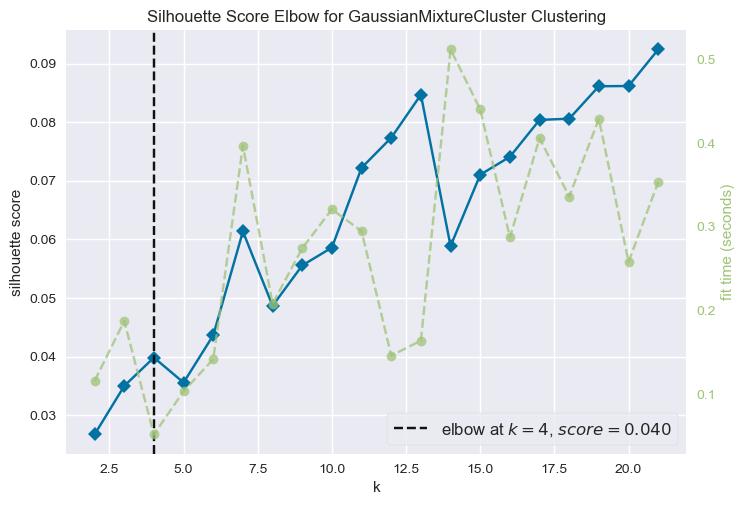

calinski_harabasz


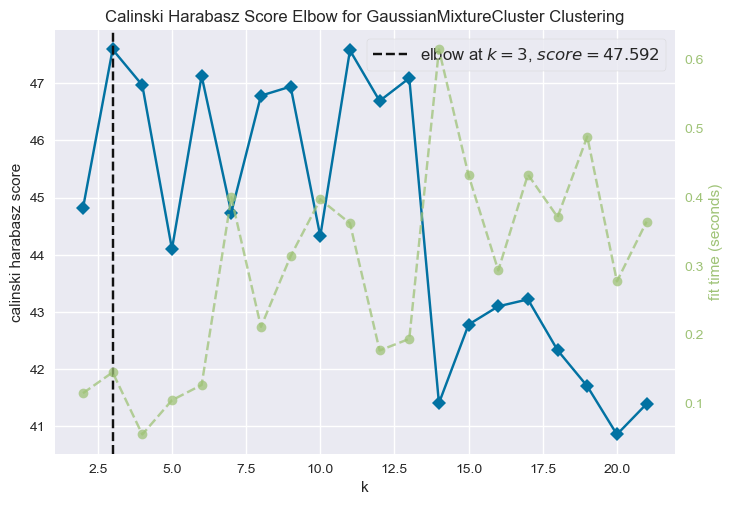

In [86]:
ica = FastICA(n_components=30)
X_transformed = ica.fit(data).transform(data)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(X_transformed)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
#     plt.close()

## RP

In [95]:
rp = SparseRandomProjection(n_components=30)
X_transformed = rp.fit_transform(x)
clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c).fit(X_transformed)
    homo[i] = homogeneity_score(y,km.predict(X_transformed))
    comp [i] = completeness_score(y,km.predict(X_transformed))
    adjust_mut_info[i] = ami(y,km.predict(X_transformed))

20it [00:03,  6.02it/s]


Text(0, 0.5, 'Score')

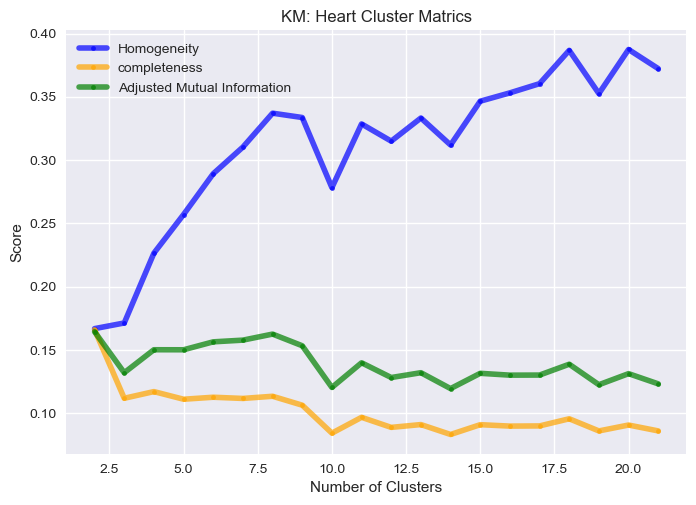

In [96]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KM: Heart Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

## NN

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# nn_arch= [(25,),(25,25),(50),(50,50),(100,25,100)]
nn_arch = [(10,),(25,25),(50),(100,)]
# nn_lr = [.001, .006, .01, .06, .1, .6, 1]
nn_lr = [0.001,0.01, .1]


def run_grid_search(dim_red,mlp, X, Y):
    grid ={'NN__learning_rate_init':nn_lr,'NN__hidden_layer_sizes':nn_arch}      
    mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
    pipe = Pipeline([('dim_red',dim_red),('NN',mlp)])
    gs = GridSearchCV(pipe,grid,verbose=10,cv=5)
    gs.fit(X, Y)
    return gs

In [140]:
grid ={'learning_rate_init':nn_lr,'hidden_layer_sizes':nn_arch}      
mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
gs = GridSearchCV(mlp,grid,verbose=10,cv=5)
gs.fit(x, y)
gs.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START hidden_layer_sizes=(10,), learning_rate_init=0.001.........
[CV 1/5; 1/12] END hidden_layer_sizes=(10,), learning_rate_init=0.001;, score=0.475 total time=   0.0s
[CV 2/5; 1/12] START hidden_layer_sizes=(10,), learning_rate_init=0.001.........
[CV 2/5; 1/12] END hidden_layer_sizes=(10,), learning_rate_init=0.001;, score=0.377 total time=   0.0s
[CV 3/5; 1/12] START hidden_layer_sizes=(10,), learning_rate_init=0.001.........
[CV 3/5; 1/12] END hidden_layer_sizes=(10,), learning_rate_init=0.001;, score=0.639 total time=   0.1s
[CV 4/5; 1/12] START hidden_layer_sizes=(10,), learning_rate_init=0.001.........
[CV 4/5; 1/12] END hidden_layer_sizes=(10,), learning_rate_init=0.001;, score=0.783 total time=   0.1s
[CV 5/5; 1/12] START hidden_layer_sizes=(10,), learning_rate_init=0.001.........
[CV 5/5; 1/12] END hidden_layer_sizes=(10,), learning_rate_init=0.001;, score=0.633 total time=   0.1s
[CV 1/5; 2/12] STAR

[CV 5/5; 9/12] END hidden_layer_sizes=50, learning_rate_init=0.1;, score=0.733 total time=   0.1s
[CV 1/5; 10/12] START hidden_layer_sizes=(100,), learning_rate_init=0.001.......
[CV 1/5; 10/12] END hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=0.738 total time=   0.1s
[CV 2/5; 10/12] START hidden_layer_sizes=(100,), learning_rate_init=0.001.......
[CV 2/5; 10/12] END hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=0.820 total time=   0.1s
[CV 3/5; 10/12] START hidden_layer_sizes=(100,), learning_rate_init=0.001.......
[CV 3/5; 10/12] END hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=0.820 total time=   0.1s
[CV 4/5; 10/12] START hidden_layer_sizes=(100,), learning_rate_init=0.001.......
[CV 4/5; 10/12] END hidden_layer_sizes=(100,), learning_rate_init=0.001;, score=0.783 total time=   0.1s
[CV 5/5; 10/12] START hidden_layer_sizes=(100,), learning_rate_init=0.001.......
[CV 5/5; 10/12] END hidden_layer_sizes=(100,), learning_rate_init=0.001;, sco

MLPClassifier(early_stopping=True, learning_rate_init=0.01, max_iter=2000,
              random_state=5)

In [113]:
mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
pca = PCA(random_state=42)
gs = run_grid_search(pca,mlp,x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001.
[CV 1/5; 1/12] END NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001;, score=0.328 total time=   0.2s
[CV 2/5; 1/12] START NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001.
[CV 2/5; 1/12] END NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001;, score=0.230 total time=   0.1s
[CV 3/5; 1/12] START NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001.
[CV 3/5; 1/12] END NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001;, score=0.738 total time=   0.0s
[CV 4/5; 1/12] START NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001.
[CV 4/5; 1/12] END NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001;, score=0.250 total time=   0.0s
[CV 5/5; 1/12] START NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001.
[CV 5/5; 1/12] END NN__hidden_layer_sizes=(10,), NN__learning_rate_init=0.001;, score=0.33

[CV 1/5; 10/12] END NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001;, score=0.770 total time=   0.1s
[CV 2/5; 10/12] START NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001
[CV 2/5; 10/12] END NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001;, score=0.885 total time=   0.1s
[CV 3/5; 10/12] START NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001
[CV 3/5; 10/12] END NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001;, score=0.803 total time=   0.1s
[CV 4/5; 10/12] START NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001
[CV 4/5; 10/12] END NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001;, score=0.717 total time=   0.1s
[CV 5/5; 10/12] START NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001
[CV 5/5; 10/12] END NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.001;, score=0.783 total time=   0.1s
[CV 1/5; 11/12] START NN__hidden_layer_sizes=(100,), NN__learning_rate_init=0.01
[CV 1/5; 11/12] END NN__hi

In [114]:
print(gs.best_estimator_)

Pipeline(steps=[('dim_red', PCA(random_state=42)),
                ('NN',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=50,
                               learning_rate_init=0.01, max_iter=2000,
                               random_state=5))])


In [172]:
train_acc_org = []
cv_means_org = []
n_components = np.arange(2,x.shape[1]+1)
for i,n in tqdm(enumerate(n_components)):     
    mlp = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
    test_acc = cross_val_score(mlp,x,y,cv=5)
    mlp.fit(x,y)
    train_acc = accuracy_score(y, mlp.predict(x))
    train_acc_org.append(train_acc)
    cv_means_org.append(test_acc.mean())
    
    
    

21it [01:20,  3.84s/it]


In [173]:
cv_means_org

[0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754,
 0.8281967213114754]

In [182]:
train_acc_pca = []
cv_means_pca = []
n_components = np.arange(2,x.shape[1]+1)
for i,n in tqdm(enumerate(n_components)): 
    pca = PCA(n_components=n,random_state=42)
    pca.fit(x)
    X_transformed = pca.transform(x)
    mlp = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
    
    test_acc= cross_val_score(mlp,X_transformed,y,cv=5)
    mlp.fit(X_transformed,y)
    
    train_acc = accuracy_score(y, mlp.predict(X_transformed))
   
    train_acc_pca.append(train_acc)
    cv_means_pca.append(test_acc.mean())
    


21it [00:50,  2.39s/it]


In [179]:
train_acc_ica = []
cv_means_ica= []
n_components = np.arange(2,x.shape[1]+1)
for i,n in tqdm(enumerate(n_components)): 
    ica = FastICA(n_components=n,random_state=42)
    ica.fit(x)
    
    X_transformed = ica.transform(x)
    mlp = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
    
    test_acc= cross_val_score(mlp,X_transformed,y,cv=5)
    mlp.fit(X_transformed,y)
    
    train_acc = accuracy_score(y, mlp.predict(X_transformed))
    
    train_acc_ica.append(train_acc)
    cv_means_ica.append(test_acc.mean())
    


21it [01:03,  3.03s/it]


In [180]:
train_acc_rp = []
cv_means_rp= []
n_components = np.arange(2,x.shape[1]+1)
for i,n in tqdm(enumerate(n_components)): 
    rp = SparseRandomProjection(n_components=n,random_state=42)
    rp.fit(x)
    
    X_transformed = rp.transform(x)
    mlp = MLPClassifier(solver='sgd', alpha=0.1,learning_rate_init=1e-2,hidden_layer_sizes=(10, ),activation='relu', random_state=7,max_iter=1000)
    
    test_acc= cross_val_score(mlp,X_transformed,y,cv=5)
    mlp.fit(X_transformed,y)
    
    train_acc = accuracy_score(y, mlp.predict(X_transformed))
    
    train_acc_rp.append(train_acc)
    cv_means_rp.append(test_acc.mean())
    


21it [00:48,  2.29s/it]


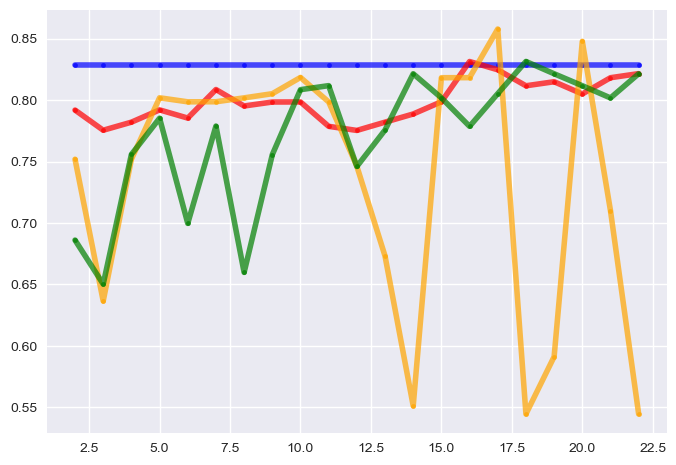

In [185]:
plt.plot(n_components,cv_means_org,marker='.', color='blue', linewidth=4, alpha=0.7,label='test-orignal')
# plt.plot(n_components,train_acc_org,linestyle='dashed', color='blue', linewidth=4, alpha=0.7,label='train-orginal')

plt.plot(n_components,cv_means_pca,marker='.', color='red', linewidth=4, alpha=0.7,label='test-PCA')
# plt.plot(n_components,train_acc_pca,linestyle='dashed', color='red', linewidth=4, alpha=0.7,label='train-PCA')

plt.plot(n_components,cv_means_ica,marker='.', color='orange', linewidth=4, alpha=0.7,label='test-ICA')
# plt.plot(n_components,train_acc_ica,linestyle='dashed', color='orange', linewidth=4, alpha=0.7,label='train-ICA')

plt.plot(n_components,cv_means_rp,marker='.', color='green', linewidth=4, alpha=0.7,label='test-ICA')
# plt.plot(n_components,train_acc_rp,linestyle='dashed', color='green', linewidth=4, alpha=0.7,label='train-ICA')

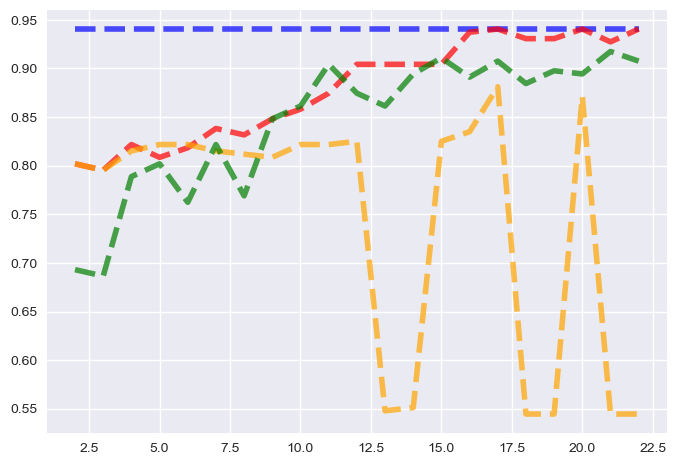

In [186]:
# plt.plot(n_components,cv_means_org,marker='.', color='blue', linewidth=4, alpha=0.7,label='test-orignal')
plt.plot(n_components,train_acc_org,linestyle='dashed', color='blue', linewidth=4, alpha=0.7,label='train-orginal')

# plt.plot(n_components,cv_means_pca,marker='.', color='red', linewidth=4, alpha=0.7,label='test-PCA')
plt.plot(n_components,train_acc_pca,linestyle='dashed', color='red', linewidth=4, alpha=0.7,label='train-PCA')

# plt.plot(n_components,cv_means_ica,marker='.', color='orange', linewidth=4, alpha=0.7,label='test-ICA')
plt.plot(n_components,train_acc_ica,linestyle='dashed', color='orange', linewidth=4, alpha=0.7,label='train-ICA')

# plt.plot(n_components,cv_means_rp,marker='.', color='green', linewidth=4, alpha=0.7,label='test-ICA')
plt.plot(n_components,train_acc_rp,linestyle='dashed', color='green', linewidth=4, alpha=0.7,label='train-ICA')